In [1]:
QUESTION 1

In [ ]:
import pandas as pd

In [2]:
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user", sep = "|")
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [3]:
users.groupby("occupation").age.mean()

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

In [4]:
users.rename(columns={"sex":"gender"}, inplace=True)

In [5]:
genders = users.groupby("occupation")["gender"].value_counts(normalize=True)*100
genders.head()

occupation     gender
administrator  M          54.430380
               F          45.569620
artist         M          53.571429
               F          46.428571
doctor         M         100.000000
Name: proportion, dtype: float64

In [6]:
gendersn = pd.DataFrame(genders)
gendersn.rename(columns={"gender":"percent"}, inplace=True)
gendersn.head()

proportion
occupation    gender            
administrator M        54.430380
              F        45.569620
artist        M        53.571429
              F        46.428571
doctor        M       100.000000

In [7]:
new_gen = pd.DataFrame(gendersn.reset_index(level=["occupation", "gender"]))
new_gen.head()

,occupation,gender,proportion
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000


In [13]:
males = new_gen[new_gen["gender"] == "M"].sort_values(by="proportion",ascending=False)
males

,occupation,gender,proportion
4,doctor,M,100.000000
7,engineer,M,97.014925
37,technician,M,96.296296
29,retired,M,92.857143
27,programmer,M,90.909091
11,executive,M,90.625000
33,scientist,M,90.322581
9,entertainment,M,88.888889
17,lawyer,M,83.333333
31,salesman,M,75.000000


In [14]:
users.groupby("occupation").age.agg([min, max])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [15]:
users.groupby(["occupation", "gender"]).age.mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [16]:
new_gen

,occupation,gender,proportion
0,administrator,M,54.430380
1,administrator,F,45.569620
2,artist,M,53.571429
3,artist,F,46.428571
4,doctor,M,100.000000
5,educator,M,72.631579
6,educator,F,27.368421
7,engineer,M,97.014925
8,engineer,F,2.985075
9,entertainment,M,88.888889


In [ ]:
QUESTION 2

In [18]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv', sep=',')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [19]:
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [20]:
euro12.shape[0]

16

In [21]:
euro12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [22]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [23]:
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [24]:
round(discipline['Yellow Cards'].mean())

7

In [25]:
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [26]:
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [27]:
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [28]:
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [29]:
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


In [ ]:
QUESTION 3

In [30]:
import numpy as np

In [31]:
s1 = pd.Series(np.random.randint(1, high=5, size=100, dtype='l'))
s2 = pd.Series(np.random.randint(1, high=4, size=100, dtype='l'))
s3 = pd.Series(np.random.randint(10000, high=30001, size=100, dtype='l'))

print(s1, s2, s3)

0     4
1     3
2     2
3     4
4     1
     ..
95    2
96    4
97    4
98    3
99    3
Length: 100, dtype: int32 0     1
1     1
2     1
3     3
4     2
     ..
95    3
96    1
97    1
98    3
99    2
Length: 100, dtype: int32 0     25476
1     12466
2     15075
3     16787
4     16249
      ...  
95    22376
96    26229
97    28333
98    19734
99    28099
Length: 100, dtype: int32


In [32]:
housemkt = pd.concat([s1, s2, s3], axis=1)
housemkt.head()

,0,1,2
0,4,1,25476
1,3,1,12466
2,2,1,15075
3,4,3,16787
4,1,2,16249


In [33]:
housemkt.rename(columns = {0: 'bedrs', 1: 'bathrs', 2: 'price_sqr_meter'}, inplace=True)
housemkt.head()

,bedrs,bathrs,price_sqr_meter
0,4,1,25476
1,3,1,12466
2,2,1,15075
3,4,3,16787
4,1,2,16249


In [34]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)

bigcolumn = bigcolumn.to_frame()
print(type(bigcolumn))

bigcolumn

<class 'pandas.core.frame.DataFrame'>


,0
0,4
1,3
2,2
3,4
4,1
...,...
95,22376
96,26229
97,28333
98,19734


In [35]:
len(bigcolumn)

300

In [36]:
bigcolumn.reset_index(drop=True, inplace=True)
bigcolumn

,0
0,4
1,3
2,2
3,4
4,1
...,...
295,22376
296,26229
297,28333
298,19734


In [ ]:
QUESTION 4

In [37]:
import datetime

In [48]:
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

C:\Users\nandi\AppData\Local\Temp\ipykernel_11980\1722172166.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]])


,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [49]:
def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [50]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

data = data.set_index('Yr_Mo_Dy')

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [51]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [52]:
data.shape[0] - data.isnull().sum()

data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [53]:
data.sum().sum() / data.notna().sum().sum()

10.227883764282181

In [54]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [55]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1)    #min
day_stats['max'] = data.max(axis = 1)    #max 
day_stats['mean'] = data.mean(axis = 1)  #mean
day_stats['std'] = data.std(axis = 1)    #standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [56]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [57]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [58]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [59]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [60]:
# resample data to 'W' week and use the functions
weekly = data.resample('W').agg(['min','max','mean','std'])

# slice it for the first 52 weeks and locations
weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)

RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

In [ ]:
QUESTION 5

In [61]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

In [62]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [63]:
chipo.shape[0]

4622

In [64]:
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [65]:
chipo.shape[1]

5

In [66]:
chipo.columns.values

array(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'], dtype=object)

In [67]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [68]:
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).index[0]

'Chicken Bowl'

In [69]:
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


In [70]:
chipo.groupby(['item_name']).quantity.sum().sort_values(ascending = False).values[0]

761

In [71]:
chipo.groupby('item_name').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


In [72]:
chipo.groupby(['choice_description']).quantity.sum().sort_values(ascending = False).index[0]

'[Diet Coke]'

In [73]:
chipo.groupby('choice_description').sum().sort_values(['quantity'], ascending=False).head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


In [74]:
chipo.quantity.sum()

4972

In [75]:
chipo.dtypes.item_price

dtype('O')

In [76]:
chipo.item_price = chipo.item_price.apply(lambda x: float(x[1:]))

In [77]:
chipo.item_price.dtypes

dtype('float64')

In [78]:
chipo['revenue'] = chipo['quantity']*chipo.item_price
total_revenue = chipo.revenue.sum()
total_revenue

39237.02

In [79]:
total_order = chipo.order_id.nunique()
total_order

1834

In [80]:
total_revenue / total_order

21.39423118865867

In [81]:
chipo.item_name.value_counts().count()

50

In [ ]:
QUESTION 6

In [2]:
import pandas as pd

In [3]:
us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

In [ ]:
QUESTION 7

In [15]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


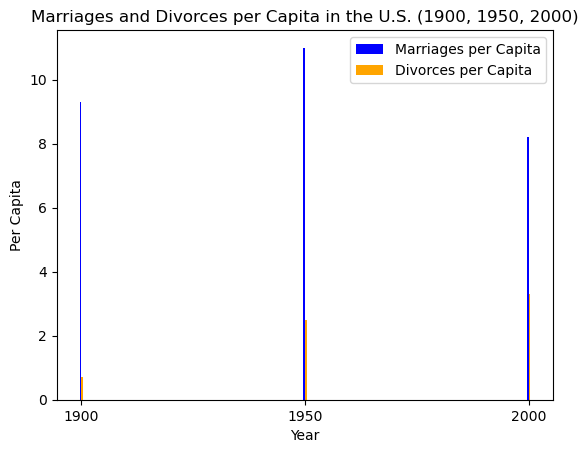

In [16]:
import matplotlib.pyplot as plt

us_marriage_divorce_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_marriage_divorce_data = us_marriage_divorce_data[
    us_marriage_divorce_data['Year'].apply(lambda x: x in [1900, 1950, 2000])]

years = us_marriage_divorce_data['Year'].values
marriages_per_capita = us_marriage_divorce_data['Marriages_per_1000'].values
divorces_per_capita = us_marriage_divorce_data['Divorces_per_1000'].values

bar_width = 0.35

fig, ax = plt.subplots()
marriage_bars = ax.bar(years, marriages_per_capita, width=bar_width, label='Marriages per Capita', color='blue')
divorce_bars = ax.bar([year + bar_width for year in years], divorces_per_capita, width=bar_width, label='Divorces per Capita', color='orange')


ax.set_xlabel('Year')
ax.set_ylabel('Per Capita')
ax.set_title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
ax.set_xticks([year + bar_width / 2 for year in years])
ax.set_xticklabels(years)
ax.legend()

# Show the plot
plt.show()

In [ ]:
QUESTION 8

In [8]:
hollywood_actor_kills = pd.read_csv('actor_kill_counts.csv')
hollywood_actor_kills

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [13]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


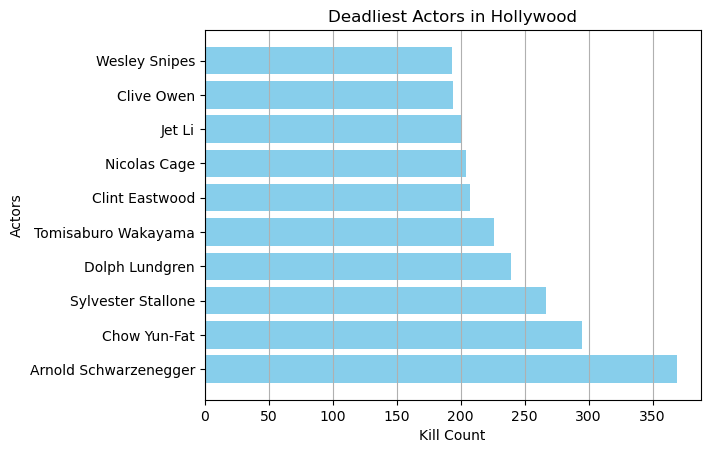

In [14]:
import matplotlib.pyplot as plt

hollywood_actor_kills = pd.read_csv('actor_kill_counts.csv')
actor_names = hollywood_actor_kills['Actor'].values
kill_counts = hollywood_actor_kills['Count'].values

sorted_indices = sorted(range(len(kill_counts)), key=lambda k: kill_counts[k], reverse=True)
sorted_actors = [actor_names[i] for i in sorted_indices]
sorted_kill_counts = [kill_counts[i] for i in sorted_indices]

plt.barh(sorted_actors, sorted_kill_counts, color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actors')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x')

# Display the plot
plt.show()

In [ ]:
QUESTION 9

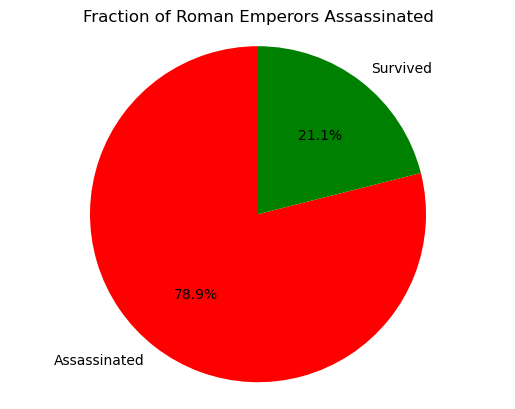

In [21]:
import matplotlib.pyplot as plt

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
assassinated_emperors = roman_emperors[
    roman_emperors['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())]

number_assassinated = len(assassinated_emperors)
other_deaths = len(roman_emperors) - number_assassinated

percentage_assassinated = (number_assassinated / other_deaths) * 100
percentage_survived = 100 - percentage_assassinated

labels = ['Assassinated', 'Survived']
sizes = [percentage_assassinated, percentage_survived]
colors = ['red', 'green']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax.set_title('Fraction of Roman Emperors Assassinated')

# Show the plot
plt.show()


In [ ]:
QUESTION 10

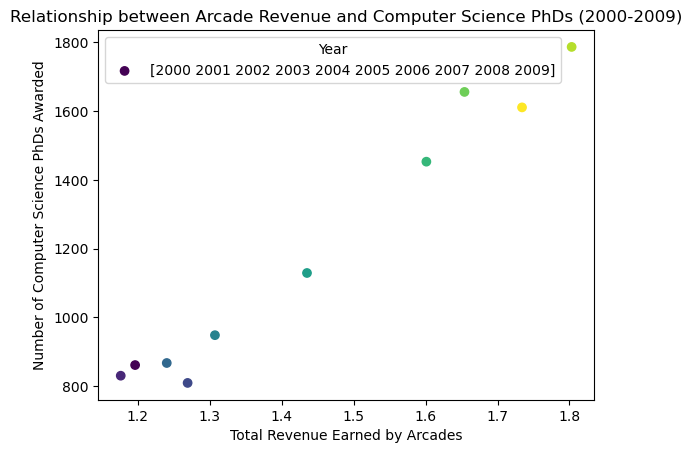

In [22]:
import matplotlib.pyplot as plt
import numpy as np

arcade_revenue_cs_doctorates = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revenue = arcade_revenue_cs_doctorates['Total Arcade Revenue (billions)'].values
cs_doctorates_awarded = arcade_revenue_cs_doctorates[
    'Computer Science Doctorates Awarded (US)'].values
years = np.arange(2000, 2010)

colors = plt.cm.viridis(np.linspace(0, 1, len(years)))

plt.scatter(arcade_revenue, cs_doctorates_awarded, c=colors, label=years)
plt.xlabel('Total Revenue Earned by Arcades')
plt.ylabel('Number of Computer Science PhDs Awarded')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs (2000-2009)')
plt.legend(title='Year')

# Show the plot
plt.show()
